# Using GeneNetwork and MPD to retrieve a phenotype and plot them

Here we will pull the same mouse phenotypes from two resources, GeneNetwork and Mouse Phenome Database. The phenotype we are working with is the latency of nociceptive response to hot plate (54°C) in a 30 s test across the BXD strain population and early inbreeding generations of the Collaborative Cross. We will then plot the distribution of this phenotype across these two populations.


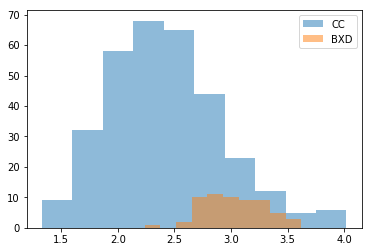

In [66]:
import numpy
import io
import pandas as pd
import requests

import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize


#read data from the GeneNetwork
bxd_req = requests.get('http://robot.genenehttp://localhost:8891/notebooks/CS-SA/CSNA/ShortCourse_2018/02_Accessing_Mouse_Data_Resources/code/queryMouseResources_GN-MPD_plots.ipynb#twork.org/webqtl/main.py?cmd=trait&probeset=11897&db=BXDPublish&format=col')  
bxd = pd.read_csv(io.StringIO(bxd_req.text), sep='\t') 

#access data
bxd_hp=bxd['11897']

#log transform the phenotype
log_bxd_hp = numpy.log2(bxd_hp) 


#read data from Mouse Phenome Database
mpd = requests.get("https://phenome.jax.org/api/pheno/animalvals/43574") 
mpd_hp = json.loads(mpd.text)
mpd_hp_animaldata = json_normalize(mpd_hp['animaldata'])

#Compute strain means
cc_hp_animaldata=mpd_hp_animaldata[mpd_hp_animaldata['strain'].str.contains("PreCC")]
cc_hp_mean = cc_hp_animaldata.groupby('strain')['value'].mean()

#log transform the phenotype
log_cc_hp = numpy.log2(cc_hp_mean)


#plot the phenotype distributions
plt.hist(log_cc_hp,  alpha=0.5, label='CC')
plt.hist(log_bxd_hp,   alpha=0.5, label='BXD')
plt.legend(loc='upper right')
plt.show()